# Plot temperature response over time

This notebook plots temperature respons to SLCFs AND the total scenario forcing in a fixed nr of years

## Imports:

import matplotlib.pyplot as plt
import pandas as pd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import xarray as xr
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%load_ext autoreload
%autoreload 2

In [3]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic
from ar6_ch6_rcmipfigs.utils.plot import get_var_nicename

<IPython.core.display.Javascript object>

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in
hallo


In [4]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_recommendation.nc'

#### Uncertainty data from Chris

In [5]:
#PATH_DT_UNCERTAINTY = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris.nc'
PATH_DT_UNCERTAINTY = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris_ed02-3.nc'

## Set values:

In [6]:
first_y = '1750'
last_y = '2100'
# Years to plot:
years = ['2040', '2100']

**Set reference year for temperature change:**

In [7]:
ref_year = '2020'

In [8]:
FIGURE_DIR = RESULTS_DIR / 'figures_recommendation/'

TABS_DIR = RESULTS_DIR / 'tables_recommendation/'

In [9]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

In [10]:
recommendation = 'recommendation'
name_deltaT = 'Delta T'
sum_v = 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'

scenario_tot = 'Scenario total'

### Define variables to look at:

In [11]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-total',
    'o3',
    'HFCs',
    'bc_on_snow']
variables_erf_comp = [
    'aerosol-total-with_bc-snow',
    'ch4',
    # 'aerosol-radiation_interactions',
    # 'aerosol-cloud_interactions',
    #'aerosol-total',
    'o3',
    'HFCs',
    #'bc_on_snow'
]

# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:

In [12]:

scenarios_fl_370 = ['ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden'  # Due to mistake here
                    ]

### Scenarios:

In [13]:
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp334',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']
scenarios_fl_oneNTCF = ['ssp119',
                        'ssp126',
                        'ssp245',
                        'ssp370',
                        'ssp370-lowNTCF-aerchemmip',
                        # 'ssp370-lowNTCF-gidden',
                        'ssp585']

In [14]:
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'

In [15]:
table_csv_name = TABS_DIR / '3-2_table_all_scen.csv'
print(table_csv_name)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables_recommendation/3-2_table_all_scen.csv


In [16]:

variables_tot = ['Total']
variables_sum = ['Sum SLCFs']


def setup_table_prop(scenario_n='', yrs=None, _vlist=None, scens=None):
    if _vlist is None:
        _vlist = variables_erf_comp
    if yrs is None:
        yrs = ['2040', '2100']
    if scens is None:
        scens = scenarios_fl
    its = [yrs, _vlist]
    _i = pd.MultiIndex.from_product(its, names=['', ''])
    table = pd.DataFrame(columns=scens, index=_i)  # .transpose()
    table.index.name = scenario_n
    return table

## Open dataset:

### Integrate:
The code below opens the file generated in [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) by integrating

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

where IRF is the impulse response function and ERF is the effective radiative forcing from RCMIP. 

In [17]:
ds_DT = xr.open_dataset(PATH_DT)
ds_uncertainty = xr.open_dataset(PATH_DT_UNCERTAINTY)

In [18]:
print(PATH_DT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP_recommendation.nc


## Add sum as variable:

In [19]:
_str = ''
_vl = [get_var_nicename(var).split('(')[0].strip() for var in variables_erf_comp]
for var in _vl:
    _str += f'{var}, '

# ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])


vn_sum = 'Sum SLCF (%s)' % _str[:-2]
print(vn_sum)

# _st = vn_sum.replace('(','').replace(')','').replace(' ','_').replace(',','')+'.csv'


_da_sum = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable)
# _da = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable).sel(year=slice(int(s_y2), int(e_y2))) - ds_DT_sy
_da_sum  # .assin_coord()
# _ds_check = ds_DT.copy()
ds_DT
# xr.concat([_ds_check[name_deltaT],_da_sum], dim=variable)

dd1 = _da_sum.expand_dims(
    {'variable':
         ['Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)']})
# dd1=dd1.to_dataset()

ds_DT = xr.merge([ds_DT, dd1])

Sum SLCF (Aerosols, Methane, Ozone, HFCs)


## Compute sum of all SLCF forcers

In [20]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, get_scenario_ls_dic

In [21]:


cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()


def sum_name(_var):
    """
    Returns the name off the sum o
    """
    return f'{_var} sum '




### compute sum: 

sum_name = 'Sum SLCFs'
ds_sub = ds_DT.sel(variable=variables_erf_comp)
ds_sum = ds_sub.sum(variable)
ds_sum = ds_sum.assign_coords(coords={variable: sum_name})
# add sum to variable coordinatem

ds_sum = xr.concat([ds_sum, ds_DT.sel(variable=variables_erf_comp)], dim=variable)

In [22]:
ds_sum = ds_DT  # .assign_coords(coords={variable:sum_name})



rn_dic = {}
for v in variables_all:
    rn_dic[v] = get_var_nicename(v)

rn_dic_scen = {#'Total': scenario_tot,
    'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip',
    'ssp370-lowNTCF-gidden': 'ssp370-lowNTCF\n-gidden',
}

In [23]:
def fix_names(df):
    df = df.rename(rn_dic)
    df = df.rename(rn_dic_scen, axis=1)
    return df

In [24]:
scntab_dic = {}


# tab_tot = setup_table2()
# tab_tot_sd = setup_table2()
def table_of_sts(_ds, _scn_fl, variables, tab_vars, _yrs, ref_yr, sts=recommendation):
    """
    Creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios,

    :param _ds:
    :param _scn_fl:
    :param variables:
    :param tab_vars:
    :param _yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=_yrs, _vlist=tab_vars)
    for scn in _scn_fl:
        for _var, tabvar in zip(variables, tab_vars):
            # dtvar =  name_deltaT # if ERF name, changes it here.
            tabscn = scn  # Table scenario name the same.
            for year in _yrs:
                _da = _ds[name_deltaT].sel(scenario=scn, variable=_var)
                _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
                _da_y = _da.sel(year=slice(year, year))  # year value
                _tab_da = _da_y - _da_refy
                tabel.loc[(year, tabvar), tabscn] = float(_tab_da.sel(percentile=sts).squeeze().values)  # [0]
    return fix_names(tabel)
    #return tabel





def table_of_stats_varsums(_ds, dsvar, tabvar, yrs, ref_yr, sts=recommendation):
    """
    Sums up over dimension 'variable' and creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios. 

    :param tabvar:
    :param dsvar:
    :param _ds:
    :param yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=yrs, _vlist=[tabvar])
    da = _ds[name_deltaT].sel(variable=dsvar)

    for scn in scenarios_fl:
        tabscn = scn  # Table scenario name the same.
        for year in yrs:
            _da = da.sel(scenario=scn, percentile=sts)  # , variable = dsvar)
            _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
            _da_y = _da.sel(year=slice(year, year)).squeeze()  # year value
            _tab_da = (_da_y - _da_refy).squeeze()

            # Do statistics over RCMIP models
            tabel.loc[(year, tabvar), tabscn] = float(_tab_da.squeeze().values)  # [0]

    return tabel

### Computes statistics:

In [25]:
ds_uncertainty = ds_uncertainty.to_array('percentile').rename(name_deltaT).to_dataset()
ds_uncertainty

<xarray.Dataset>
Dimensions:      (base_period: 1, percentile: 10, scenario: 11, variable: 8, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
  * variable     (variable) object 'HFCs' ... 'aerosol-total-with_bc-snow'
  * percentile   (percentile) <U7 'p05' 'p16' 'p50' ... 'p84-p50' 'p95-p50'
Data variables:
    Delta T      (percentile, scenario, variable, year, base_period) float64 0.0 ... 0.1942

In [26]:
ds_DT.percentile

<xarray.DataArray 'percentile' (percentile: 1)>
array(['recommendation'], dtype=object)
Coordinates:
  * percentile  (percentile) object 'recommendation'

In [27]:
ds_DT.variable.values





array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc-snow', 'bc_on_snow', 'ch4',
       'co2', 'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic',
       'total_natural', 'volcanic'], dtype=object)

In [28]:
from ar6_ch6_rcmipfigs.utils.plot import nice_name_var as nice_name_var_dic

## Make csv table:


In [29]:
import pandas as pd

In [30]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp + [sum_v, 'total_anthropogenic'],
                              variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                              ref_year)
_tab = tabel_dT_slcfs.transpose()

o3 = 'Ozone (O$_3$)'
ch4 = 'Methane (CH$_4$)'
HFCs = 'HFCs'
_sum = 'CH$_4$+O$_3$+HFCs'
for year in ['2040', '2100']:
    _tab[(year, _sum)] = _tab[(year, o3)] + _tab[(year, ch4)] + _tab[(year, HFCs)]
_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()

In [31]:
_tab

ssp119  \
                                                                      
2040 Aerosols                                              0.273794   
     CH$_4$+O$_3$+HFCs                                    -0.110568   
     HFCs                                                0.00538032   
     Methane (CH$_4$)                                    -0.0328498   
     Ozone (O$_3$)                                       -0.0830983   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.163226   
     total_anthropogenic                                   0.397428   
2100 Aerosols                                              0.424517   
     CH$_4$+O$_3$+HFCs                                    -0.315336   
     HFCs                                               -0.00378865   
     Methane (CH$_4$)                                     -0.163074   
     Ozone (O$_3$)                                        -0.148473   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.109181   
     total_anthropogenic                                   0.116036   

                                                             ssp126  \
                                                                      
2040 Aerosols                                               0.22836   
     CH$_4$+O$_3$+HFCs                                   -0.0636707   
     HFCs                                                 0.0170608   
     Methane (CH$_4$)                                    -0.0208684   
     Ozone (O$_3$)                                       -0.0598631   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.164689   
     total_anthropogenic                                   0.505497   
2100 Aerosols                                              0.434063   
     CH$_4$+O$_3$+HFCs                                    -0.303945   
     HFCs                                               -0.00146604   
     Methane (CH$_4$)                                      -0.15534   
     Ozone (O$_3$)                                         -0.14714   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.130118   
     total_anthropogenic                                   0.544207   

                                                             ssp245  \
                                                                      
2040 Aerosols                                             0.0466276   
     CH$_4$+O$_3$+HFCs                                    0.0851975   
     HFCs                                                 0.0284577   
     Methane (CH$_4$)                                     0.0417628   
     Ozone (O$_3$)                                         0.014977   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.131825   
     total_anthropogenic                                   0.584779   
2100 Aerosols                                              0.281874   
     CH$_4$+O$_3$+HFCs                                     0.010594   
     HFCs                                                 0.0575687   
     Methane (CH$_4$)                                   -0.00104217   
     Ozone (O$_3$)                                       -0.0459325   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.292468   
     total_anthropogenic                                    1.75423   

                                                             ssp334  \
                                                                      
2040 Aerosols                                             0.0762187   
     CH$_4$+O$_3$+HFCs                                     0.033788   
     HFCs                                                0.00538032   
     Methane (CH$_4$)                                     0.0464901   
     Ozone (O$_3$)                                       -0.0180824   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.110007   
     total_anthropogenic                                   0.528874   
2100 Aeroso

In [32]:
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_2040_2100_tab.csv'
_tab.to_csv(fn)

### Table +/-percentiles

In [33]:
sum_v

'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'

In [34]:
ds_uncertainty.variable

<xarray.DataArray 'variable' (variable: 8)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-total', 'bc_on_snow', 'ch4', 'o3', 'total_anthropogenic',
       'aerosol-total-with_bc-snow'], dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'aerosol-total-with_bc-snow'

In [35]:
# Mean:
tabel_dT_slcfs_5th = tabel_dT_slcfs + table_of_sts(ds_uncertainty, scenarios_fl, variables_erf_comp + [sum_v, 'total_anthropogenic'],
                                                   variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                                                   ref_year, sts='p05-p50')
_tab = tabel_dT_slcfs_5th.transpose()

_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_5th_perc_2040_2100_tab.csv'
_tab.to_csv(fn)

In [36]:
# Mean:
tabel_dT_slcfs_95th = tabel_dT_slcfs + table_of_sts(ds_uncertainty, scenarios_fl,
                                                    variables_erf_comp + [sum_v, 'total_anthropogenic'],
                                                    variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                                                    ref_year, sts='p95-p50')
_tab = tabel_dT_slcfs_95th.transpose()

_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_95th_perc_2040_2100_tab.csv'
_tab.to_csv(fn)

In [37]:
_tab

ssp119  \
                                                                      
2040 Aerosols                                                   NaN   
     HFCs                                                0.00947067   
     Methane (CH$_4$)                                    -0.0222405   
     Ozone (O$_3$)                                       -0.0347797   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.354748   
     total_anthropogenic                                   0.688365   
2100 Aerosols                                                   NaN   
     HFCs                                               -0.00132075   
     Methane (CH$_4$)                                     -0.114919   
     Ozone (O$_3$)                                       -0.0691962   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.415922   
     total_anthropogenic                                   0.531052   

                                                             ssp126  \
                                                                      
2040 Aerosols                                                   NaN   
     HFCs                                                 0.0240391   
     Methane (CH$_4$)                                    -0.0108374   
     Ozone (O$_3$)                                       -0.0253763   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.342408   
     total_anthropogenic                                   0.804426   
2100 Aerosols                                                   NaN   
     HFCs                                                0.00212026   
     Methane (CH$_4$)                                       -0.1085   
     Ozone (O$_3$)                                       -0.0694797   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.435035   
     total_anthropogenic                                    1.06866   

                                                             ssp245  \
                                                                      
2040 Aerosols                                                   NaN   
     HFCs                                                 0.0379462   
     Methane (CH$_4$)                                     0.0607517   
     Ozone (O$_3$)                                        0.0282929   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.198684   
     total_anthropogenic                                   0.804911   
2100 Aerosols                                                   NaN   
     HFCs                                                 0.0805581   
     Methane (CH$_4$)                                     0.0387605   
     Ozone (O$_3$)                                      -0.00757083   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.606929   
     total_anthropogenic                                    2.61409   

                                                             ssp334  \
                                                                      
2040 Aerosols                                                   NaN   
     HFCs                                                0.00947067   
     Methane (CH$_4$)                                     0.0679034   
     Ozone (O$_3$)                                      -0.00996121   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.167135   
     total_anthropogenic                                   0.723475   
2100 Aerosols                                                   NaN   
     HFCs                                               -0.00132075   
     Methane (CH$_4$)                                     0.0320972   
     Ozone (O$_3$)                                       -0.0349232   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.432809   
     total_anthropogenic                                    1.42337   

                                                            ssp370  \
           

In [38]:
# Statistics on Delta T anthropogenic
# Mean
tabel_dT_anthrop = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years, ref_year)

# 5th
tabel_dT_anthrop_5th = -table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     ['total_anthropogenic'],
                                     [scenario_tot],
                                     years,
                                     ref_year,
                                     sts='p05-p50'
                                     )
# 95th

tabel_dT_anthrop_95th = table_of_sts(ds_uncertainty, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years, ref_year,
                                     sts='p95-p50')
tabel_dT_anthrop_95th.loc['2040']
tabel_dT_anthrop_5th.loc['2040']

,ssp119,ssp126,ssp245,ssp334,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,,
Scenario total,0.182997,0.185355,0.15336,0.142286,0.153791,0.184775,0.163584,0.209253


In [39]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp, years,
                              ref_year)
# Standard deviation
tabel_dT_slcfs_5th = -table_of_sts(ds_uncertainty,
                                   scenarios_fl,
                                   variables_erf_comp,
                                   variables_erf_comp,
                                   years,
                                   ref_year,
                                   sts='p05-p50')
tabel_dT_slcfs_95th = table_of_sts(ds_uncertainty,
                                   scenarios_fl,
                                   variables_erf_comp,
                                   variables_erf_comp,
                                   years,
                                   ref_year,
                                   sts='p95-p50')

# Compute sum of SLCFs
_ds = ds_sum.copy()
vall = 'Delta T'

In [40]:
tabel_dT_slcfs

ssp119      ssp126      ssp245      ssp334  \
                                                                        
2040 Aerosols            0.273794     0.22836   0.0466276   0.0762187   
     Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628   0.0464901   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  -0.0180824   
     HFCs              0.00538032   0.0170608   0.0284577  0.00538032   
2100 Aerosols            0.424517    0.434063    0.281874    0.322135   
     Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217 -0.00603899   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325  -0.0667722   
     HFCs             -0.00378865 -0.00146604   0.0575687 -0.00378865   

                          ssp370 ssp370-lowNTCF\n-aerchemmip  \
                                                               
2040 Aerosols          -0.052029                   0.0870509   
     Methane (CH$_4$)  0.0761809                   0.0761809   
     Ozone (O$_3$)     0.0698454                   0.0244954   
     HFCs              0.0264999                   0.0264999   
2100 Aerosols         -0.0266798                    0.284753   
     Methane (CH$_4$)   0.276651                    0.276651   
     Ozone (O$_3$)      0.236445                    0.157736   
     HFCs              0.0969879                   0.0969879   

                      ssp370-lowNTCF\n-gidden     ssp585  
                                                          
2040 Aerosols                       0.0870509   0.122591  
     Methane (CH$_4$)              -0.0362155  0.0618279  
     Ozone (O$_3$)                 -0.0442151  0.0400979  
     HFCs                            0.026497  0.0423128  
2100 Aerosols                        0.284753   0.232166  
     Methane (CH$_4$)               -0.122362   0.147478  
     Ozone (O$_3$)                 -0.0985579  0.0506565  
     HFCs                            0.083767   0.223272

In [41]:
ds_DT.variable

<xarray.DataArray 'variable' (variable: 20)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc-snow', 'bc_on_snow', 'ch4',
       'co2', 'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic', 'total_natural',
       'volcanic'], dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'volcanic'

In [42]:
v_sum = 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'
ds_uncertainty.sel(year=2040, scenario='ssp119', percentile='p05-p50', variable=v_sum)#.variables#.plot()#, variable='%%SVG')%%SVG

<xarray.Dataset>
Dimensions:      (base_period: 1)
Coordinates:
    scenario     <U6 'ssp119'
    year         int64 2040
  * base_period  (base_period) int64 2020
    variable     <U53 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'
    percentile   <U7 'p05-p50'
Data variables:
    Delta T      (base_period) float64 -0.1267

In [43]:
v_sum = 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'
ds_uncertainty.sel(year=2040, scenario='ssp119', percentile='p95-p50', variable=v_sum)#.variables#.plot()#, variable='%%SVG')%%SVG

<xarray.Dataset>
Dimensions:      (base_period: 1)
Coordinates:
    scenario     <U6 'ssp119'
    year         int64 2040
  * base_period  (base_period) int64 2020
    variable     <U53 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'
    percentile   <U7 'p95-p50'
Data variables:
    Delta T      (base_period) float64 0.1915

In [44]:
tabel_dT_sum_slcf = table_of_sts(ds_DT,
                                 scenarios_fl,
                                 [sum_v],
                                 ['Sum SLCFs'],
                                 years,
                                 ref_year
                                 )
tabel_dT_sum_slcf_5 = - table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     [sum_v],
                                     ['Sum SLCFs'],
                                     years,
                                     ref_year,
                                     sts='p05-p50')
tabel_dT_sum_slcf_95 = table_of_sts(ds_uncertainty,
                                    scenarios_fl,
                                    [sum_v],
                                    ['Sum SLCFs'],
                                    years,
                                    ref_year,
                                    sts='p95-p50')

In [45]:

tabel_dT_slcfs = fix_names(tabel_dT_slcfs)#.rename(rn_dic)
#tabel_dT_slcfs = tabel_dT_slcfs.rename(rn_dic_scen,axis=1)
tabel_dT_slcfs#.index

ssp119      ssp126      ssp245      ssp334  \
                                                                        
2040 Aerosols            0.273794     0.22836   0.0466276   0.0762187   
     Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628   0.0464901   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  -0.0180824   
     HFCs              0.00538032   0.0170608   0.0284577  0.00538032   
2100 Aerosols            0.424517    0.434063    0.281874    0.322135   
     Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217 -0.00603899   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325  -0.0667722   
     HFCs             -0.00378865 -0.00146604   0.0575687 -0.00378865   

                          ssp370 ssp370-lowNTCF\n-aerchemmip  \
                                                               
2040 Aerosols          -0.052029                   0.0870509   
     Methane (CH$_4$)  0.0761809                   0.0761809   
     Ozone (O$_3$)     0.0698454                   0.0244954   
     HFCs              0.0264999                   0.0264999   
2100 Aerosols         -0.0266798                    0.284753   
     Methane (CH$_4$)   0.276651                    0.276651   
     Ozone (O$_3$)      0.236445                    0.157736   
     HFCs              0.0969879                   0.0969879   

                      ssp370-lowNTCF\n-gidden     ssp585  
                                                          
2040 Aerosols                       0.0870509   0.122591  
     Methane (CH$_4$)              -0.0362155  0.0618279  
     Ozone (O$_3$)                 -0.0442151  0.0400979  
     HFCs                            0.026497  0.0423128  
2100 Aerosols                        0.284753   0.232166  
     Methane (CH$_4$)               -0.122362   0.147478  
     Ozone (O$_3$)                 -0.0985579  0.0506565  
     HFCs                            0.083767   0.223272

In [46]:
rn_dic

{'aerosol-total-with_bc-snow': 'Aerosols',
 'ch4': 'Methane (CH$_4$)',
 'o3': 'Ozone (O$_3$)',
 'HFCs': 'HFCs',
 'total_anthropogenic': 'total_anthropogenic',
 'total': 'total'}

## colors

In [47]:
cdic = get_cmap_dic(variables_erf_comp)  # , palette='colorblind'):
ls = [cdic[key] for key in variables_erf_comp]

ls

(0.5607843137254902, 0.0, 0.6470588235294118)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)


[(0.5607843137254902, 0.0, 0.6470588235294118),
 (1.0, 0.4196078431372549, 0.07450980392156863),
 (0.5254901960784314, 0.7803921568627451, 0.29411764705882354),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]

In [48]:
cdic

{'aerosol-total-with_bc-snow': (0.5607843137254902, 0.0, 0.6470588235294118),
 'ch4': (1.0, 0.4196078431372549, 0.07450980392156863),
 'o3': (0.5254901960784314, 0.7803921568627451, 0.29411764705882354),
 'HFCs': (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)}

## Error bars only from model uncertainty
The following uncertainties assume the ECS has a standard deviation of

In [49]:
from ar6_ch6_rcmipfigs.utils.plot import scn_dic

In [50]:
from matplotlib.ticker import (MultipleLocator)

scenario_tot = 'Scenario total'

def plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs, tabel_dT_anthrop_5th,
                tabel_dT_anthrop_95th, tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95):
    tits = ['Near Term surface temperature change (2040 relative to 2020)',
            'Long Term surface T change 2100 relatie to 2020)']
    tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
    for yr, ax, tit in zip(years, axs, tits):
        # Pick out year and do various renames:
        # Total antropogenic
        tot_yr = tabel_dT_anthrop.loc[yr].rename(scn_dic, axis=1)
        # Sum SLCFs
        # uncertainty:
        bot = tabel_dT_anthrop_5th.loc[yr].rename(scn_dic, axis=1)
        top = tabel_dT_anthrop_95th.loc[yr].rename(scn_dic, axis=1)
        err = pd.merge(bot, top, how='outer').values
        # Plot bars for anthropopogenic total:
        ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values,
                color='k',
                xerr=err,
                error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2),
                label='Scenario total', alpha=.2,
                )
        # Plot bars for SLCFs total:
        sum_SLCFs = 'Sum SLCFs'

        # Plot stacked plot of components:
        _tab = tabel_dT_slcfs.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
        _tab = _tab.rename(scn_dic, axis=0)
        a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
        _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
        # ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
        # uncertainty:
        bot = tabel_dT_sum_slcf_5.loc[yr].rename(scn_dic, axis=1)
        top = tabel_dT_sum_slcf_95.loc[yr].rename(scn_dic, axis=1)
        err = pd.merge(bot, top, how='outer').values

        ax.errorbar(_t, list(_t.reset_index().index), xerr=err, label='__nolabel__', color='w', fmt='d',
                    linestyle="None")  # ,

        if not yr == '2040':
            ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
        # Zero line:
        ax.axvline(0, linestyle='--', color='k', alpha=0.4)
        ax.set_title(tit)
        ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
        ax.xaxis.set_minor_locator(MultipleLocator(.1))
        # ax.grid(axis='y', which='major')

def fix_axs(axs):
    ax = axs[0]

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(right=False, left=False)  # , color='w')

    ax = axs[1]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(labelleft=False, right=False, left=False, color='w')
    ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
    ax.yaxis.set_visible(False)
    plt.tight_layout()

In [51]:
for tab in [tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs]:
    display(tab)

,,ssp119,ssp126,ssp245,ssp334,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,,,
2040,Scenario total,0.397428,0.505497,0.584779,0.528874,0.663786,0.75756,0.566941,0.836875
2100,Scenario total,0.116036,0.544207,1.75423,0.900552,3.15208,3.37383,2.64906,4.11427


,,ssp119,ssp126,ssp245,ssp334,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,,,
2040,Sum SLCFs,0.163226,0.164689,0.131825,0.110007,0.120497,0.214227,0.0331173,0.266829
2100,Sum SLCFs,0.109181,0.130118,0.292468,0.245535,0.583404,0.816129,0.1476,0.653572


ssp119      ssp126      ssp245      ssp334  \
                                                                        
2040 Aerosols            0.273794     0.22836   0.0466276   0.0762187   
     Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628   0.0464901   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  -0.0180824   
     HFCs              0.00538032   0.0170608   0.0284577  0.00538032   
2100 Aerosols            0.424517    0.434063    0.281874    0.322135   
     Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217 -0.00603899   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325  -0.0667722   
     HFCs             -0.00378865 -0.00146604   0.0575687 -0.00378865   

                          ssp370 ssp370-lowNTCF\n-aerchemmip  \
                                                               
2040 Aerosols          -0.052029                   0.0870509   
     Methane (CH$_4$)  0.0761809                   0.0761809   
     Ozone (O$_3$)     0.0698454                   0.0244954   
     HFCs              0.0264999                   0.0264999   
2100 Aerosols         -0.0266798                    0.284753   
     Methane (CH$_4$)   0.276651                    0.276651   
     Ozone (O$_3$)      0.236445                    0.157736   
     HFCs              0.0969879                   0.0969879   

                      ssp370-lowNTCF\n-gidden     ssp585  
                                                          
2040 Aerosols                       0.0870509   0.122591  
     Methane (CH$_4$)              -0.0362155  0.0618279  
     Ozone (O$_3$)                 -0.0442151  0.0400979  
     HFCs                            0.026497  0.0423128  
2100 Aerosols                        0.284753   0.232166  
     Methane (CH$_4$)               -0.122362   0.147478  
     Ozone (O$_3$)                 -0.0985579  0.0506565  
     HFCs                            0.083767   0.223272

In [52]:
tabel_dT_sum_slcf_5.rename(scn_dic, axis=1)

,,SSP1-1.9,SSP1-2.6,SSP2-4.5,SSP3-3.4,SSP3-7.0,SSP3-7.0-LowNTCF\n-aerchemmip,SSP3-7.0-LowNTCF\n-Gidden,SSP5-8.5
,,,,,,,,,
2040,Sum SLCFs,0.126748,0.114972,0.0463691,0.0405653,0.0794694,0.0630824,0.0459617,0.0932667
2100,Sum SLCFs,0.191259,0.189288,0.181712,0.133621,0.149032,0.251273,0.154966,0.230278


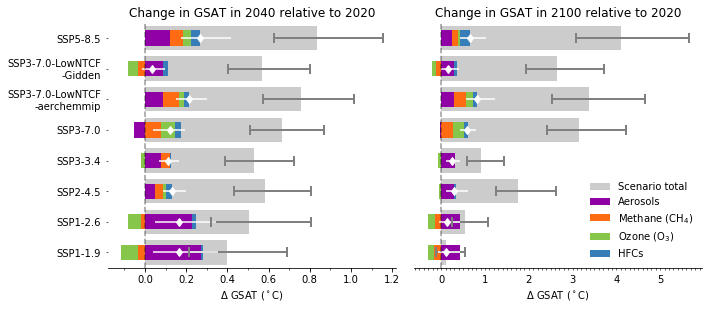

In [53]:
fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs,tabel_dT_anthrop_5th,
            tabel_dT_anthrop_95th, tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [54]:

scen_no_lowNTCF = [scn for scn in scenarios_fl if 'lowNTCF' not in scn]
print(scen_no_lowNTCF)

['ssp119', 'ssp126', 'ssp245', 'ssp334', 'ssp370', 'ssp585']


In [55]:
subset_scenarios = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))

In [56]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [57]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245     ssp370  \
                                                                       
2040 Aerosols            0.273794     0.22836   0.0466276  -0.052029   
     Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628  0.0761809   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  0.0698454   
     HFCs              0.00538032   0.0170608   0.0284577  0.0264999   
2100 Aerosols            0.424517    0.434063    0.281874 -0.0266798   
     Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217   0.276651   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325   0.236445   
     HFCs             -0.00378865 -0.00146604   0.0575687  0.0969879   

                      ssp370-lowNTCF\n-aerchemmip     ssp585  
                                                              
2040 Aerosols                           0.0870509   0.122591  
     Methane (CH$_4$)                   0.0761809  0.0618279  
     Ozone (O$_3$)                      0.0244954  0.0400979  
     HFCs                               0.0264999  0.0423128  
2100 Aerosols                            0.284753   0.232166  
     Methane (CH$_4$)                    0.276651   0.147478  
     Ozone (O$_3$)                       0.157736  0.0506565  
     HFCs                               0.0969879   0.223272

- Include BC in aerosol total. 
- aaarggh, sorry, a last request, maybe one version with also SSP370lowNTC with and without CH4 decrease (as it was in SOD) and one without and we will see later which one we choose depending on the discussion which will remain in the TS.
- net values. Send. 
- include total in black. 

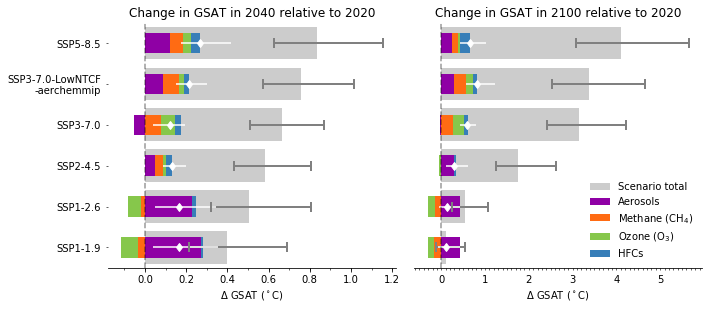

In [58]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)
fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

plt.show()

In [59]:
#tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
#tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]


subset_scenarios = list(pd.Series(scen_no_lowNTCF).replace(rn_dic_scen))

In [60]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [61]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245      ssp334  \
                                                                        
2040 Aerosols            0.273794     0.22836   0.0466276   0.0762187   
     Methane (CH$_4$)  -0.0328498  -0.0208684   0.0417628   0.0464901   
     Ozone (O$_3$)     -0.0830983  -0.0598631    0.014977  -0.0180824   
     HFCs              0.00538032   0.0170608   0.0284577  0.00538032   
2100 Aerosols            0.424517    0.434063    0.281874    0.322135   
     Methane (CH$_4$)   -0.163074    -0.15534 -0.00104217 -0.00603899   
     Ozone (O$_3$)      -0.148473    -0.14714  -0.0459325  -0.0667722   
     HFCs             -0.00378865 -0.00146604   0.0575687 -0.00378865   

                          ssp370     ssp585  
                                             
2040 Aerosols          -0.052029   0.122591  
     Methane (CH$_4$)  0.0761809  0.0618279  
     Ozone (O$_3$)     0.0698454  0.0400979  
     HFCs              0.0264999  0.0423128  
2100 Aerosols         -0.0266798   0.232166  
     Methane (CH$_4$)   0.276651   0.147478  
     Ozone (O$_3$)      0.236445  0.0506565  
     HFCs              0.0969879   0.223272

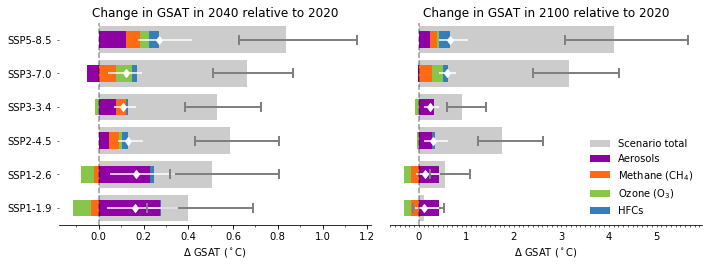

In [62]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.8], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [63]:
#tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
#tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]

scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]
subset_scenarios = list(pd.Series(scenario_370).replace(rn_dic_scen))

In [64]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

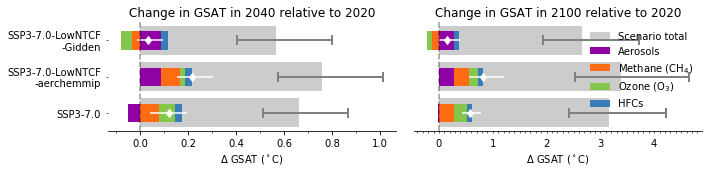

In [65]:
from matplotlib.ticker import (MultipleLocator)
fig, axs = plt.subplots(1, len(years), figsize=[10, 2.5], sharex=False, sharey=True)

plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_horiz_errTot_370only.png'

plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [66]:
variables_erf_comp

['aerosol-total-with_bc-snow', 'ch4', 'o3', 'HFCs']

In [67]:
variables_erf_comp_nbc = ['ch4', 'aerosol-total-with_bc-snow', 'o3', 'HFCs']

In [68]:
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)

In [69]:
subset_scenarios = scen_no_lowNTCF
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

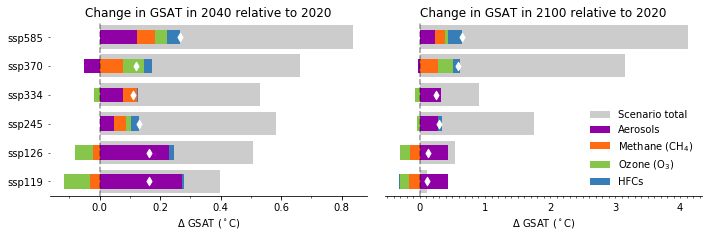

In [70]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.4], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    # ax.scatter(_t, _t.index, zorder=100, c='w', marker='d')
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')

    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [71]:
subset_scen_fl = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))
tabel_dT_slcfs_noBC = table_of_sts(ds_DT, scenarios_fl_oneNTCF, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
#tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
#tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
#tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl#]

In [72]:
subset_scenarios = subset_scen_fl
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs_noBC[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
#tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
#tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
#tabel_dT_slcfs2_5th = tabel_dT_slcfs_5th[subset_scenarios]
#tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
#tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

ssp119                         0.163226
ssp126                         0.164689
ssp245                         0.131825
ssp370                         0.120497
ssp370-lowNTCF\n-aerchemmip    0.214227
ssp585                         0.266829
dtype: float64
ssp119                         0.109181
ssp126                         0.130118
ssp245                         0.292468
ssp370                         0.583404
ssp370-lowNTCF\n-aerchemmip    0.816129
ssp585                         0.653572
dtype: float64


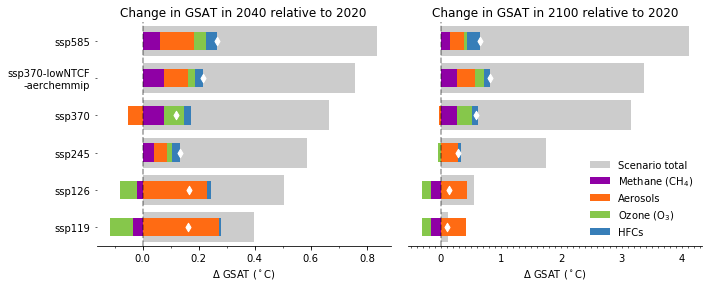

In [73]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.1], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [74]:
subset_scen_fl = list(pd.Series(scenarios_fl).replace(rn_dic_scen))
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl]

ssp119                         0.163226
ssp126                         0.164689
ssp245                         0.131825
ssp334                         0.110007
ssp370                         0.120497
ssp370-lowNTCF\n-aerchemmip    0.214227
ssp370-lowNTCF\n-gidden        0.033117
ssp585                         0.266829
dtype: float64
ssp119                         0.109181
ssp126                         0.130118
ssp245                         0.292468
ssp334                         0.245535
ssp370                         0.583404
ssp370-lowNTCF\n-aerchemmip    0.816129
ssp370-lowNTCF\n-gidden        0.147600
ssp585                         0.653572
dtype: float64


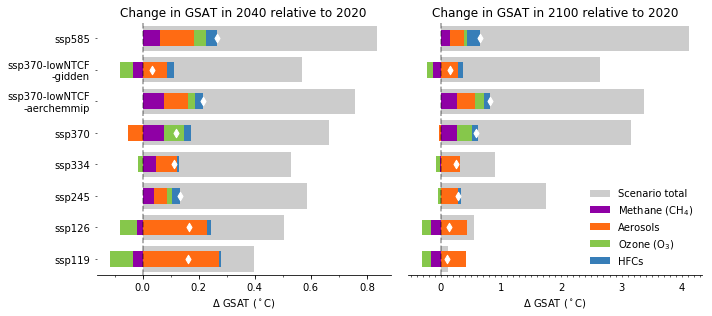

In [75]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.5], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_all_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

## Error bars from model uncertainty AND ECS uncertainty

See [Uncertainty_calculation.ipynb](Uncertainty_calculation.ipynb)

## Only ssp370:

In [76]:
scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]